In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('KaggleV2-May-2016.csv.zip')

In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Viewing main info about df

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   PatientId       110527 non-null  float64 
 1   AppointmentID   110527 non-null  int64   
 2   Gender          110527 non-null  category
 3   ScheduledDay    110527 non-null  object  
 4   AppointmentDay  110527 non-null  object  
 5   Age             110527 non-null  int64   
 6   Neighbourhood   110527 non-null  object  
 7   Scholarship     110527 non-null  int64   
 8   Hipertension    110527 non-null  int64   
 9   Diabetes        110527 non-null  int64   
 10  Alcoholism      110527 non-null  int64   
 11  Handcap         110527 non-null  int64   
 12  SMS_received    110527 non-null  int64   
 13  No-show         110527 non-null  object  
dtypes: category(1), float64(1), int64(8), object(4)
memory usage: 11.1+ MB


# Checking for duplicates

In [15]:
df.duplicated().sum()

0

# Exploring the unique values of the each column

In [16]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

# Exploring handcap values

In [17]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

# Exploring age column distribution

In [18]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

# Dropping columns and validating changes

In [19]:
df.drop(['PatientId','AppointmentID'],axis = 1,inplace = True)
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

# Handling date data type

In [20]:
df.AppointmentDay.unique

<bound method Series.unique of 0         2016-04-29T00:00:00Z
1         2016-04-29T00:00:00Z
2         2016-04-29T00:00:00Z
3         2016-04-29T00:00:00Z
4         2016-04-29T00:00:00Z
                  ...         
110522    2016-06-07T00:00:00Z
110523    2016-06-07T00:00:00Z
110524    2016-06-07T00:00:00Z
110525    2016-06-07T00:00:00Z
110526    2016-06-07T00:00:00Z
Name: AppointmentDay, Length: 110527, dtype: object>

In [21]:
#extracting only day, month and year values
df['ScheduledDay'] = df['ScheduledDay'].str[ :10]
df['AppointmentDay'] = df['AppointmentDay'].str[ :10]
#changing data type
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
#confirming changes
print(df[['AppointmentDay', 'ScheduledDay']].dtypes)
df.head()

AppointmentDay    datetime64[ns]
ScheduledDay      datetime64[ns]
dtype: object


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [22]:
#making new due days column
df['due-days'] = df['AppointmentDay'] - df['ScheduledDay']
#converting data type
df['due-days'] = df['due-days'].dt.days
#drop sch and appoint col
df.drop(['AppointmentDay','ScheduledDay'], axis = 1,inplace = True)

# Viewing summery statistics

In [23]:
df['due-days'].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

# Viewing negative days values

In [24]:
df[df['due-days'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


# Droping these values and conforming changes

In [25]:
df.drop(df[df['due-days'] < 0].index,inplace = True)
df['due-days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: due-days, dtype: float64

# converting columns to bool and conforming changes

In [26]:
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received']
df[cols] = df[cols].astype('bool')
df[cols].dtypes

Scholarship     bool
Hipertension    bool
Diabetes        bool
Alcoholism      bool
SMS_received    bool
dtype: object

# Parising and casting No-show column

In [27]:
df.loc[df['No-show'] =='Yes', 'No-show'] = 0
df.loc[df['No-show'] == 'No', 'No-show'] = 1
df['No-show'] = df['No-show'].astype(bool)
df['No-show'].dtypes

dtype('bool')

In [28]:
#converting column and conforming changes
df['Gender'] = df['Gender'].astype('category')
df['Gender'].dtypes


CategoricalDtype(categories=['F', 'M'], ordered=False)

In [29]:
df[df['Handcap'] > 1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
946,M,94,BELA VISTA,False,True,True,False,2,True,True,15
1665,M,64,SANTA MARTHA,False,True,False,True,2,True,True,30
1666,M,64,SANTA MARTHA,False,True,False,True,2,False,True,30
2071,M,64,SANTA MARTHA,False,True,False,True,2,False,True,0
2091,F,11,ANDORINHAS,False,False,False,False,2,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
108376,F,44,ROMÃO,False,True,True,False,2,True,True,6
109484,M,64,DA PENHA,False,True,True,False,2,False,True,2
109733,F,34,JUCUTUQUARA,False,False,False,False,2,True,True,4
109975,M,39,PRAIA DO SUÁ,True,False,False,False,2,True,True,4


In [30]:
#filling the bigger value with 1
df.loc[df['Handcap'].isin([2,3,4]),'Handcap'] = 1
#casting type and conforming changes
df['Handcap'] = df['Handcap'].astype('bool')
df['Handcap'].unique()

array([False,  True])

# Cleaning age column

In [31]:
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
99832,F,-1,ROMÃO,False,False,False,False,False,False,True,0


In [32]:
#dropping row with negative age and conforming changes
df.drop(df[df['Age'] < 0].index, inplace = True)
df[df['Age'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days


In [33]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,due-days
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Gender         110521 non-null  category
 1   Age            110521 non-null  int64   
 2   Neighbourhood  110521 non-null  object  
 3   Scholarship    110521 non-null  bool    
 4   Hipertension   110521 non-null  bool    
 5   Diabetes       110521 non-null  bool    
 6   Alcoholism     110521 non-null  bool    
 7   Handcap        110521 non-null  bool    
 8   SMS_received   110521 non-null  bool    
 9   No-show        110521 non-null  bool    
 10  due-days       110521 non-null  int64   
dtypes: bool(7), category(1), int64(2), object(1)
memory usage: 4.2+ MB


# Viewing count plot of gender distribution in our dataset

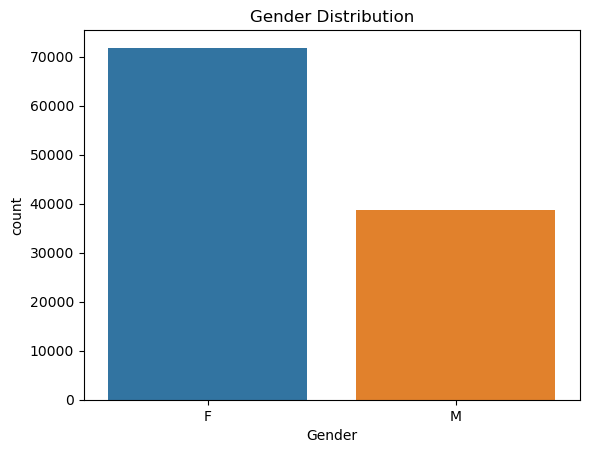

In [35]:
sns.countplot(x = 'Gender', data = df)
plt.title("Gender Distribution")
plt.show()

# Viewing count plot of gender distribution against age in our dataset

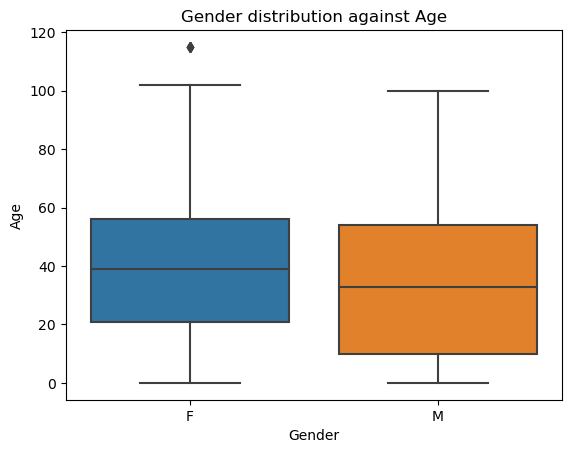

In [36]:
sns.boxplot(x = 'Gender', y = 'Age',data = df)
plt.title("Gender distribution against Age")
plt.show()

In [37]:
df['No-show'].value_counts()

True     88207
False    22314
Name: No-show, dtype: int64

# Showing gender diatribution with respect to the no-show column

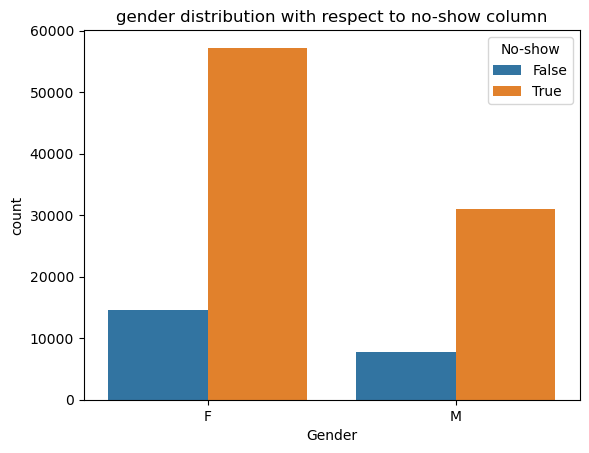

In [38]:
sns.countplot(x = 'Gender', data = df, hue = 'No-show')
plt.title('gender distribution with respect to no-show column')
plt.show()

# Viewing count plot of receving SMS distribution in our data set

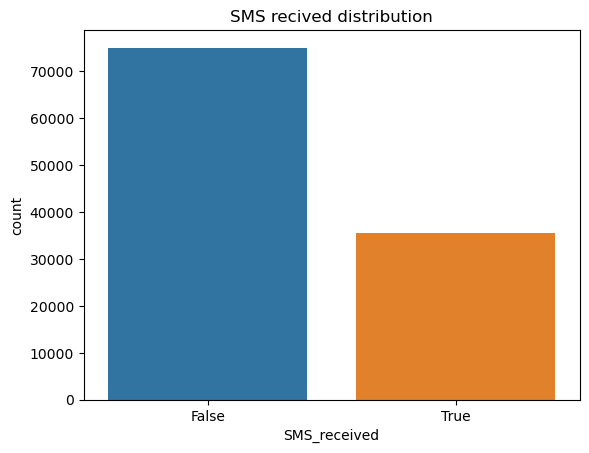

In [40]:
sns.countplot(x = 'SMS_received', data = df)
plt.title("SMS recived distribution")
plt.show()

In [42]:
df['SMS_received'].value_counts()

False    75039
True     35482
Name: SMS_received, dtype: int64

# 

# Vewing the correlation between no-show and due-days without outliers

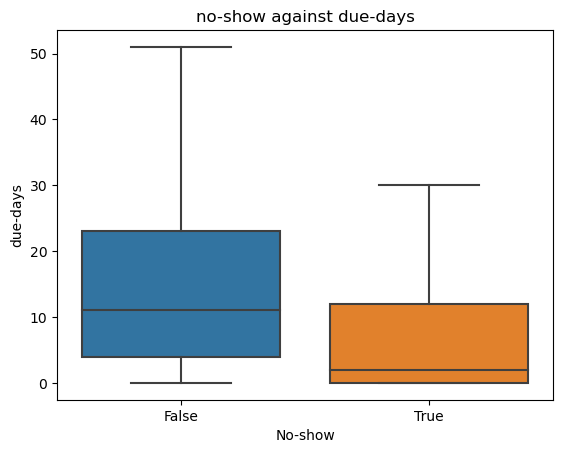

In [44]:
sns.boxplot(x = 'No-show', y = 'due-days',data = df,showfliers = False)
plt.title('no-show against due-days')
plt.show()

# 

# Viewing the correlation between no=show and due-days without outliers with respect to gender

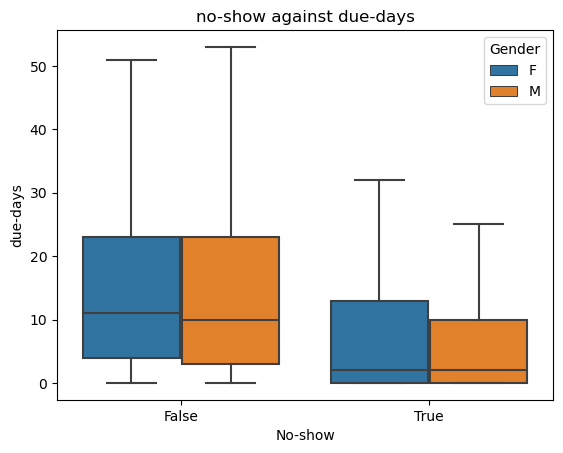

In [45]:
sns.boxplot(x = 'No-show', y = 'due-days',data = df,hue = 'Gender',showfliers = False)
plt.title('no-show against due-days')
plt.show()

# Plotting scholarship against age

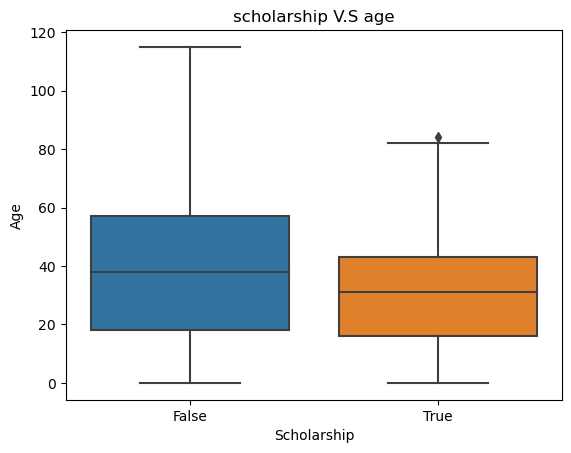

In [46]:
sns.boxplot(x = 'Scholarship', y = 'Age',data = df)
plt.title('scholarship V.S age')
plt.show()

# plotting age distribution

<Axes: >

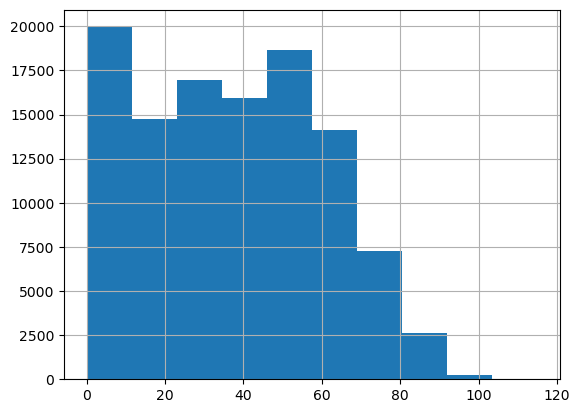

In [47]:
df['Age'].hist()

# Plotting diseases against no show

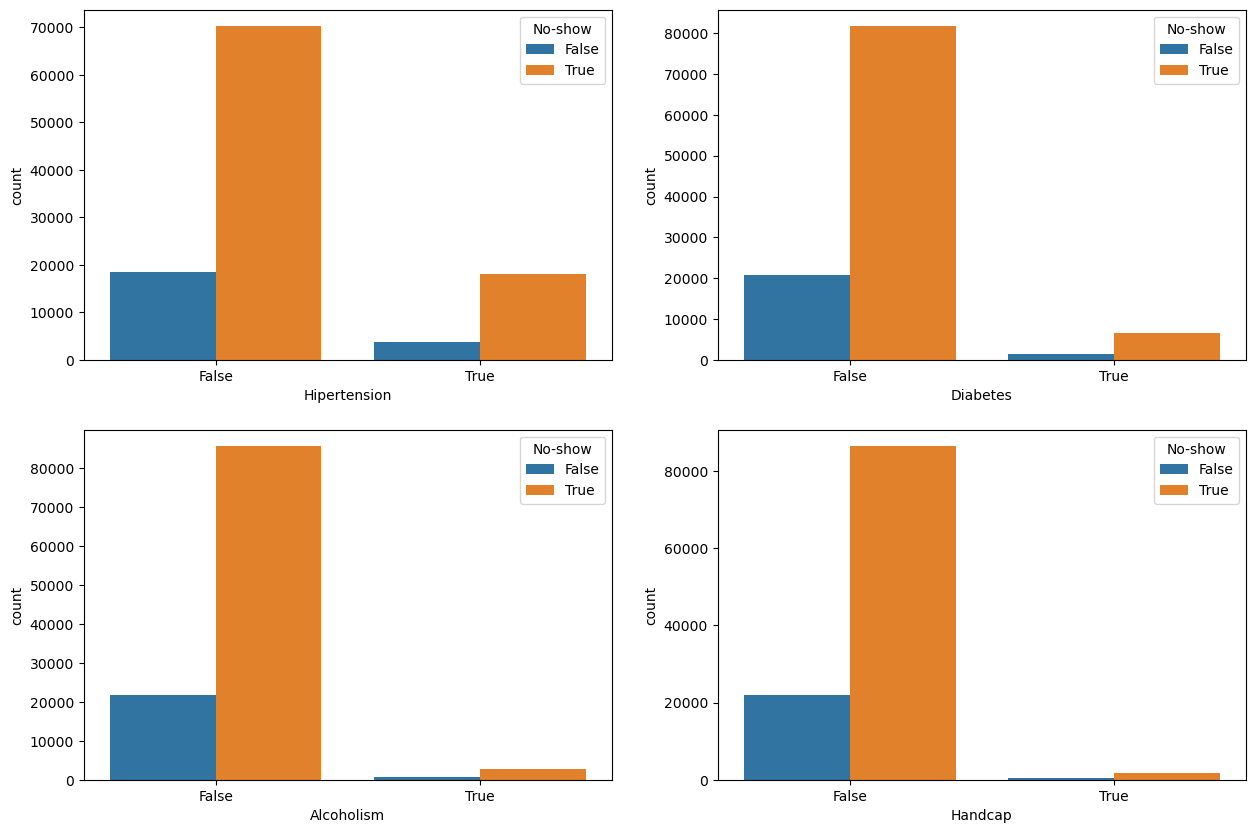

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x = 'Hipertension',data = df, hue='No-show')
plt.subplot(2,2,2)
sns.countplot(x = 'Diabetes', data = df, hue = 'No-show')
plt.subplot(2,2,3)
sns.countplot(x = 'Alcoholism', data = df, hue = 'No-show')
plt.subplot(2,2,4)
sns.countplot(x = 'Handcap', data = df,hue = 'No-show')
plt.show()

# Plotting diseases against no show with respect to age

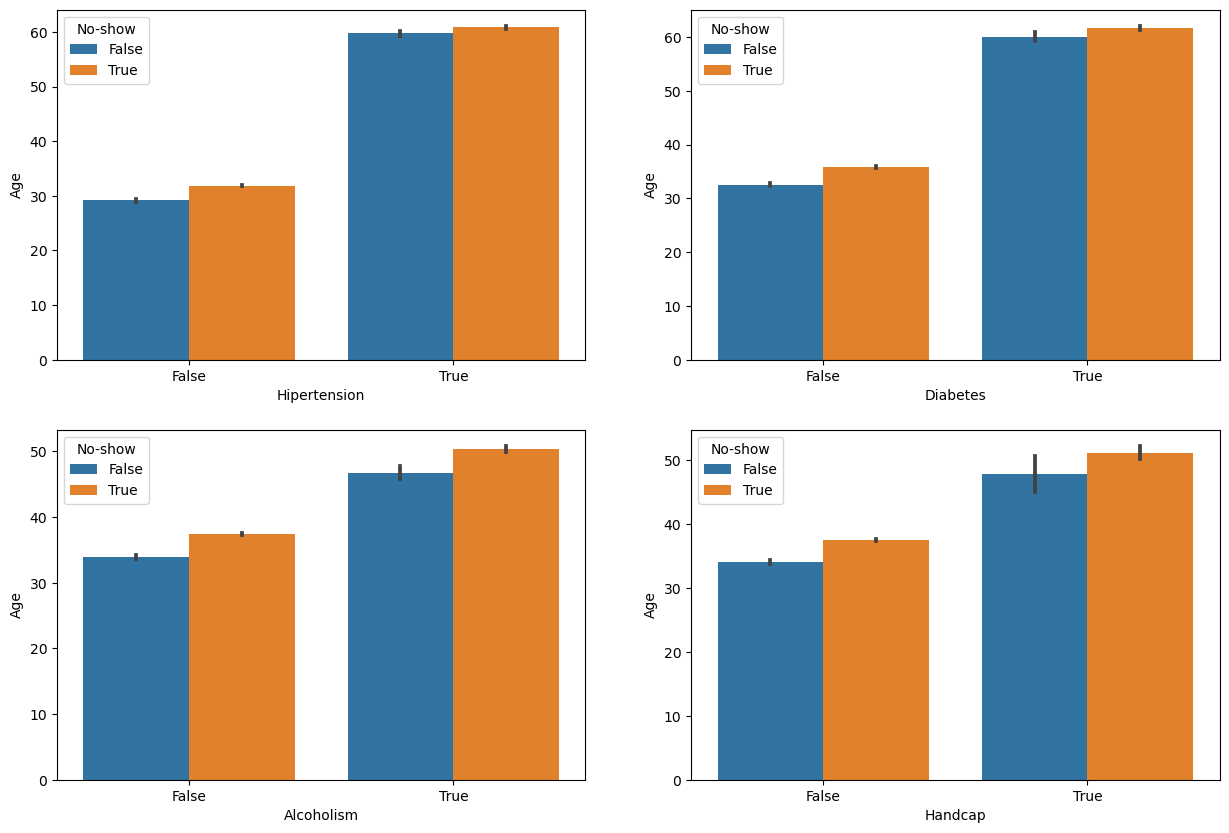

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x = 'Hipertension', y = 'Age', data = df,hue = 'No-show')
plt.subplot(2,2,2)
sns.barplot(x = 'Diabetes', y = 'Age',data = df,hue = 'No-show')
plt.subplot(2,2,3)
sns.barplot(x = 'Alcoholism', y = 'Age', data = df, hue = 'No-show')
plt.subplot(2,2,4)
sns.barplot(x = 'Handcap', y = 'Age', data = df, hue = 'No-show')
plt.show()